# **Ch10 구매이력을 활용한 사용자 그룹화**
- **처음 배우는 머신러닝** 10장 : [**(GitHub)**](https://github.com/your-first-ml-book/Examples)
- **군집화 알고리즘 :** 군집 **K** 갯수를 정의하여 분석 합니다
- **데이터의 전체적인 분석** 으로 명확한 기준까지 도달하진 못합니다 

## **Python Functions**
- **Counter()** : list 객체내 string 들을 Count 합니다
- **setdefault()**: list 객체를 dict로 변환하여 출력

In [1]:
# Counter() List 내 객체의 수를 측정합니다
import collections
collections.Counter(['a', 'b', 'c', 'a', 'b', 'b'])

Counter({'a': 2, 'b': 3, 'c': 1})

In [5]:
collections.Counter('asbdfsfgsfsg')

Counter({'a': 1, 's': 4, 'b': 1, 'd': 1, 'f': 3, 'g': 2})

In [2]:
collections.Counter({'a':2, 'b':3, 'c':1})

Counter({'a': 2, 'b': 3, 'c': 1})

In [4]:
collections.Counter({'a':2, 'b':3, 'c':1})

Counter({'a': 2, 'b': 3, 'c': 1})

In [3]:
collections.Counter(a=2, b=3, c=1)

Counter({'a': 2, 'b': 3, 'c': 1})

In [4]:
s, d = ['a', 'b', 'c', 'b', 'a', 'b', 'c'], {}
for k in s:
    # value 없으면 입력값을(0), 있으면 value를 출력
    d.setdefault(k, 0) # list를 dict으로 초기화
    print(d)
    d[k] += 1  # counting 계산을 합니다

{'a': 0}
{'a': 1, 'b': 0}
{'a': 1, 'b': 1, 'c': 0}
{'a': 1, 'b': 1, 'c': 1}
{'a': 1, 'b': 2, 'c': 1}
{'a': 2, 'b': 2, 'c': 1}
{'a': 2, 'b': 3, 'c': 1}


## **1 데이터 전처리 및 임베딩**
### **01 데이터 구조 살펴보기 및 전처리**
- 파일을 읽어 위에 정의한 데이터구조를 분석합니다

In [5]:
# 영국 소매업체의 선물/ 기념품 판매데이터
# ! cat ./data/online_retail_utf.txt  | head -n 4

import pandas as pd
data = './data/online_retail_utf.txt'
df   = pd.read_csv(data, header=0, error_bad_lines=False, sep='\t', low_memory=False)
# df.describe()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### **02 데이터의 기초 통계량 및 시각화**
- 기초통계는 Scipy의 stats 모듈을 사용합니다
- **scipy.stats.describe** (data, axis=0, ddof=1, bias=True, nan_policy='propagate')
- user_product_dic_raw : **[사용자] 상품코드**
- product_user_dic : **[상품코드] 사용자ID**
- product_id_name_dic : **[상품코드] 상품명**

In [6]:
# 기초통계량의 분석을 위해 scipy 를 활용합니다
import time
from scipy import stats
data = './data/online_retail_utf.txt'
user_product_dic_raw = {} # key : 사용자ID, value : 상품코드
product_user_dic     = {} # key : 상품코드, value : 사용자ID
product_id_name_dic  = {} # key : 상품코드, value : 상품명

In [7]:
%%time
for line in open(data):
    line_items   = line.strip().split('\t') # 1줄씩 읽어서 처리
    user_code    = line_items[6]
    product_id   = line_items[1]
    product_name = line_items[2]
     
    if len(user_code) == 0: continue # 사용자 ID가 없으면 무시
    country    = line_items[7]       # 영국만 고려, 아닌 경우에는 무시
    if country != 'United Kingdom': continue

    # 연도 에러처리 (파일헤더를 무시)
    try: invoice_year = time.strptime(line_items[4], '%m/%d/%y %H:%M').tm_year
    except ValueError: continue

    # 2011년만 추출 (2011년이 아니면 무시)
    if invoice_year != 2011: continue

    # 읽은 정보로 데이터 구조를 채웁니다.
    # 상품 가짓수를 고려하므로 상품 코드를 셋으로 가지도록 하겠습니다.
    user_product_dic_raw.setdefault(user_code, set())
    user_product_dic_raw[user_code].add(product_id)
    product_user_dic.setdefault(product_id, set())
    product_user_dic[product_id].add(user_code)
    product_id_name_dic[product_id] = product_name

# 사용자 인덱스별 구매한 상품수 리스트
product_per_user_li = [len(x) for x in user_product_dic_raw.values()]

# 이 장에서 사용할 최종 사용자 수와 상품 가짓수를 출력해봅니다.
print('# 사용자의 수: {:,}\n# 제품 종류수: {:,}'.format(
    len(user_product_dic_raw), len(product_user_dic)))

# 사용자의 수: 3,835
# 제품 종류수: 3,588
CPU times: user 5.67 s, sys: 48.3 ms, total: 5.72 s
Wall time: 5.72 s


In [9]:
import numpy as np
# 사용자 별점평균의 기초통계량 분석
def print_statistics(array, title=""):
    sta = stats.describe(array)
    print(title, "\n%14s %15s"%('statistic','value'), "\n", 30*'-', "\n%14s %15.5f"%('size',sta[0]),\
          "\n%14s %15.5f"%('min',sta[1][0]), "\n%14s %15.5f"%('max', sta[1][1]),\
          "\n%14s %15.5f"%('mean',sta[2]), "\n%14s %15.5f"%('std', np.sqrt(sta[3])),\
          "\n%14s %15.5f"%('skew',sta[4]), "\n%14s %15.5f"%('kutosis', sta[5])) 

print_statistics(product_per_user_li, "<사용자별 구매상품 기초통계분석>")

<사용자별 구매상품 기초통계분석> 
     statistic           value 
 ------------------------------ 
          size      3835.00000 
           min         1.00000 
           max      1603.00000 
          mean        58.69074 
           std        78.78521 
          skew         5.83382 
       kutosis        72.60364


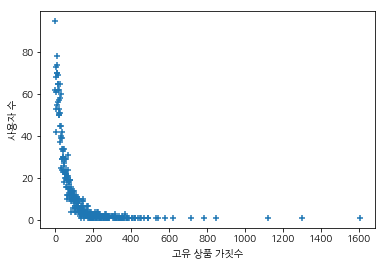

In [10]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import rc
rc('font', family=['NanumGothic','Malgun Gothic'])
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 폰트

# 사용자별 구매상품 가짓수를 플롯
from collections import Counter
import matplotlib.pyplot as plt
plot_data_all = Counter(product_per_user_li) 
plot_data_x   = list(plot_data_all.keys())
plot_data_y   = list(plot_data_all.values())
plt.xlabel('고유 상품 가짓수')
plt.ylabel('사용자 수')
plt.scatter(plot_data_x, plot_data_y, marker='+')
plt.show()

### **03 데이터 전처리**
- 구매물품이 600개 넘는사람은 드물어서 **600개 이상을 구매한 정보는 제외**
- user_product_dic : user_product_dic_raw 에서 추출한 **분석 대상자 정보**
- id_product_dic : **분석 제외 아이템 목록**

In [11]:
# 구매상품이 1개, 600개 사용자ID list 목록
min_product_user_li =[k for k,v in user_product_dic_raw.items() if len(v)==1]
max_product_user_li =[k for k,v in user_product_dic_raw.items() if len(v)>=600]
# 구매품목이 2~600개 사용자 구매물품 Dict
user_product_dic = {k:v for k,v in user_product_dic_raw.items() if len(v)>1 and len(v)<=600}
id_product_dic   = {} # 분석 제외 물품목록
for product_set_li in user_product_dic.values():
    for x in product_set_li:
        if x in id_product_dic: 
            product_id = id_product_dic[x]
        else: 
            id_product_dic.setdefault(x, len(id_product_dic))

print("# 1개 구매자: {}명\n# 600개 이상 구매자: {}명".format(
    len(min_product_user_li), len(max_product_user_li)))
print("# 2~600개 구매자: {:,}명\n# 제외품목 갯수: {:,}개".format(
    len(user_product_dic),    len(id_product_dic)))

# 1개 구매자: 95명
# 600개 이상 구매자: 7명
# 2~600개 구매자: 3,733명
# 제외품목 갯수: 3,568개


### **04 데이터 임베딩**
- user_product_dic : 전처리 완료 데이터
- user_product_vec_li : **군집화 입력** 리스트
- id_user_dic : **사용자 ID 참조를** 위한 딕셔너리

In [12]:
# 원-핫 인코딩으로 변환할 피처의 가짓수
id_user_dic         = {}  # 사용자 ID 참조를 위한 딕셔너리
user_product_vec_li = []  # 군집화의 입력으로 사용할 리스트
all_product_count   = len(id_product_dic)

for user_code, product_per_user_set in user_product_dic.items():
    # 고유상품 목록 리스트
    user_product_vec = [0] * all_product_count
    # id_user_dic의 길이로 바꿉니다.
    id_user_dic[len(id_user_dic)] = user_code 
    # Key 는 상품코드, user_product_vec 에서 상품 ID를 1로 세팅
    for product_name in product_per_user_set:
        user_product_vec[id_product_dic[product_name]] = 1
    
    # 한명의 사용자 처리가 끝난뒤, 사용자 user_product_vec을 배열에 추가
    # 이때 배열의 인덱스는 새로 정의한 user_id가 됩니다.
    user_product_vec_li.append(user_product_vec)

print('# 사용자ID: {}\n# ID별 구매물품 목록: {}'.format(
    id_user_dic[0], user_product_dic['17080']))
print("# One-Hot: {}\n# One-Hot 총 수: {:,}".format(
    user_product_vec_li[0][::100], len(user_product_vec_li[0])))

# 사용자ID: 13313
# ID별 구매물품 목록: {'23393', '23398', '23407', '84978', '23491', '23328', '23103', '23399'}
# One-Hot: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# One-Hot 총 수: 3,568


## **2 데이터 분석하기**
### **01 K-means 군집화**
- **분석의 일반화를** 위해, 데이터를 섞은 뒤 **Train(2,500)/Test(나머지)** 구분
- **sklearn** 을 활용하여 **K-means** 군집화를 진행 합니다
- **km_predict.predict**() 을 사용하여 모델링 합니다

In [13]:
from sklearn.cluster import KMeans
import random
random.shuffle(user_product_vec_li)
train_data = user_product_vec_li[ :2500]
test_data  = user_product_vec_li[2500: ]
print("# train 데이터: {:,}\n# test 데이터 : {:,}".format(
    len(train_data),len(test_data)))

# 4개 클러스터 결과를 km_predict에 저장
# km_predict.predict() 를 사용하여 예측
km_predict        = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=20).fit(train_data)
km_predict_result = km_predict.predict(test_data)
print("# 4개의 K-Means 예측모델 :", km_predict_result)

# train 데이터: 2,500
# test 데이터 : 1,233
# 4개의 K-Means 예측모델 : [3 3 3 ... 3 3 1]


### **02 정량적 평가로 K 정하기**
- **실루엣(sihouette) 기법 :** 샘플과 클러스터내 다른 샘플과 거리 **(값이 클수록 적합)**
- **엘보우(elbow) 기법 : 급내 제곱합(inertia)의** 평균을 측정합니다 **(간격 기울기가 클수록 효과가 큼)**
- 두 방법을 모두 사용한 결과 cluster 갯수는 2로 정합니다

In [14]:
# 1 실루엣 기법 : 클러스터를 2~9 개로 반복하며 실루엣 점수 측정
import numpy as np
from sklearn.metrics import silhouette_score
test_data = np.array(user_product_vec_li)

for k in range(2,9):
    km = KMeans(n_clusters=k, n_jobs=-1).fit(test_data)
    print("K = {}, shilouette 점수 {:.3f}".format(
        k, silhouette_score(test_data,km.labels_)))

K = 2, shilouette 점수 0.345
K = 3, shilouette 점수 0.213
K = 4, shilouette 점수 0.208
K = 5, shilouette 점수 0.078
K = 6, shilouette 점수 0.172
K = 7, shilouette 점수 0.187
K = 8, shilouette 점수 0.161


K = 1, K Means 급내제곱합(inertia): 208524.886686
K = 2, K Means 급내제곱합(inertia): 201135.189311
K = 3, K Means 급내제곱합(inertia): 198964.960511
K = 4, K Means 급내제곱합(inertia): 197687.894741
K = 5, K Means 급내제곱합(inertia): 197688.817637
K = 6, K Means 급내제곱합(inertia): 197183.599352
K = 7, K Means 급내제곱합(inertia): 196967.273546


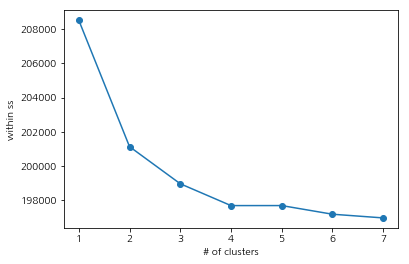

In [15]:
# 2 엘보 기법 : Key는 클러스터 수, value는 inertia(급내제곱의 총합)
ssw_dic={}

# K를 1~8까지 반복하며 급내제곱합의 평균값을 계산
for k in range(1, 8):
    km         = KMeans(n_clusters=k, n_jobs=-1).fit(test_data)
    ssw_dic[k] = km.inertia_
    print("K = {}, K Means 급내제곱합(inertia): {:3f}".format(k, km.inertia_))

plot_data_x = list(ssw_dic.keys())
plot_data_y = list(ssw_dic.values())
plt.plot(plot_data_x, plot_data_y, linestyle="-", marker='o')
plt.xlabel("# of clusters"); plt.ylabel("within ss"); plt.show()

### **03 정성적 평가로 K 정하기**
- 위의 K=2 를 사용하여 Kmeans 모델을 생성한 뒤 정성적 평가를 진행합니다
- 모든 feacture가 아닌 중요정보를 추출하여 평가를 진행합니다
    - 차원축소
    - 사용자가 많이 구입한 상품만 추출
    - 구매한 상품정보를 살펴본다
- cf) **.extend() :** List 객체를 이어 붙입니다.

In [16]:
%%time
km        = KMeans(n_clusters=2, n_init=10, max_iter=20, random_state=None)
test_data = np.array(user_product_vec_li) # 군집화 목록을 Numpy Array로 변환
km.fit(test_data)

CPU times: user 5.48 s, sys: 2.97 s, total: 8.44 s
Wall time: 4.45 s


- id_user_dict : list 변환시 **인덱스별 사용자ID**
- user_product_dic : **사용자ID** 별 **구매한 제품ID**
- product_id_name_dic : **제품ID 와 제품설명**

In [17]:
# 클러스터내, 상품명이 Uni-Gram 키워드 빈도 계산
def analyze_clusters_keywords(labels, product_id_name_dic, user_product_dic, id_user_dic):
    # 임시ID 사용자와 구매상품ID 참조 (상품ID로 상품명 값 추가)
    cluster_item = {}   
    for i in range(len(labels)):
        cluster_item.setdefault(labels[i], [])
        for x in user_product_dic[id_user_dic[i]]:
            cluster_item[labels[i]].extend([product_id_name_dic[x]])
    
    # 클러스터별 빈도상위 20개 단어 출력
    for cluster_id, product_name in cluster_item.items():    
        product_name_keyword = (" ").join(product_name).split()
        print("cluster_id:{}\n{}".format(cluster_id, Counter(product_name_keyword).most_common(20))) 

analyze_clusters_keywords(km.labels_, product_id_name_dic, user_product_dic, id_user_dic)

cluster_id:0
[('OF', 19601), ('SET', 19432), ('BAG', 14496), ('HEART', 14282), ('VINTAGE', 13818), ('RED', 13072), ('CHRISTMAS', 10831), ('RETROSPOT', 10508), ('DESIGN', 9818), ('PINK', 8653), ('BOX', 7613), ('CAKE', 7428), ('METAL', 7142), ('3', 6846), ('BLUE', 6393), ('WHITE', 6202), ('HANGING', 5935), ('JUMBO', 5926), ('HOLDER', 5837), ('PACK', 5679)]
cluster_id:1
[('OF', 3298), ('SET', 3222), ('HEART', 2604), ('RED', 2248), ('VINTAGE', 2133), ('BAG', 1971), ('RETROSPOT', 1809), ('CHRISTMAS', 1626), ('DESIGN', 1586), ('PINK', 1560), ('METAL', 1314), ('BOX', 1260), ('CAKE', 1258), ('3', 1172), ('WHITE', 1127), ('BLUE', 1083), ('HANGING', 1078), ('HOLDER', 1008), ('SIGN', 998), ('T-LIGHT', 929)]


In [18]:
# 클러스터내, 상품명이 Bi-Gram 키워드 빈도 계산
def analyze_clusters_keywords_bigram(labels, product_id_name_dic, user_product_dic, id_user_dic):
    cluster_item = {}
    for i in range(len(labels)):
        cluster_item.setdefault(labels[i], [])
        for x in user_product_dic[id_user_dic[i]]:
            cluster_item[labels[i]].extend([product_id_name_dic[x]])

    # 상품설명에 ~ OF ~ 로 연결된 부분을 제거한 Bi-gram 작업을 실행
    for cluster_id, product_name in cluster_item.items():
        bigram = []
        product_name_keyword = (' ').join(product_name).replace(' OF ', ' ').split()
        for i in range(0, len(product_name_keyword) - 1):
            bigram.append(' '.join(product_name_keyword[i:i + 2]))
        print('cluster_id:{}\n{}'.format(cluster_id, Counter(bigram).most_common(20)))

analyze_clusters_keywords_bigram(km.labels_, product_id_name_dic, user_product_dic, id_user_dic)

cluster_id:0
[('RED RETROSPOT', 5548), ('JUMBO BAG', 4835), ('LUNCH BAG', 4135), ('METAL SIGN', 4041), ('T-LIGHT HOLDER', 3969), ('HOT WATER', 3167), ('WATER BOTTLE', 3167), ('CAKE CASES', 3121), ('SET 3', 3021), ('VINTAGE CHRISTMAS', 2996), ('SET 6', 2439), ('DOLLY GIRL', 2290), ('BAG VINTAGE', 2153), ("50'S CHRISTMAS", 2047), ('VINTAGE DOILY', 1980), ('PACK 12', 1918), ('HANGING HEART', 1888), ('SET 4', 1829), ('HOME SWEET', 1692), ('SWEET HOME', 1691)]
cluster_id:1
[('RED RETROSPOT', 934), ('METAL SIGN', 793), ('T-LIGHT HOLDER', 677), ('JUMBO BAG', 579), ('HOT WATER', 562), ('WATER BOTTLE', 562), ('SET 3', 529), ('LUNCH BAG', 527), ('CAKE CASES', 482), ('VINTAGE CHRISTMAS', 426), ('SET 6', 420), ('HOME SWEET', 346), ('SWEET HOME', 346), ('HANGING HEART', 335), ('PACK 12', 318), ('SET 4', 312), ('DOLLY GIRL', 303), ('BAG VINTAGE', 285), ('VINTAGE DOILY', 265), ('KEEP CALM', 265)]


In [19]:
# 계속 비슷한 결과를 출력하기 때문에 상품별 가짓수의 평균을 출력합니다
def analyze_clusters_product_count(label, user_product_dic, id_user_dic):
    product_len_dic = {}
    for i in range(0, len(label)):
        product_len_dic.setdefault(label[i], [])
        product_len_dic[label[i]].append(len(user_product_dic[id_user_dic[i]]))
    for k, v in product_len_dic.items():
        print('cluster: {}\n{}'.format(k, stats.describe(v)))

analyze_clusters_product_count(km.labels_, user_product_dic, id_user_dic)

cluster: 0
DescribeResult(nobs=3202, minmax=(2, 580), mean=58.07276702061212, variance=4360.061869816995, skewness=2.590034721528296, kurtosis=9.106437972335737)
cluster: 1
DescribeResult(nobs=531, minmax=(2, 542), mean=60.34274952919021, variance=4851.750225633372, skewness=2.5289159546273816, kurtosis=8.582758759484728)


### **04 계층적 군집화**
- [linkage](https://rfriend.tistory.com/tag/single%20linkage%20method) 데이터 변환후, 클러스터를 **dendrogram(계통수)로** plot 합니다
- scipy의 집괴적 군집화 함수로 클러스터를 집괴 합니다. (거리 함수로는 유클리드 함수를 사용)

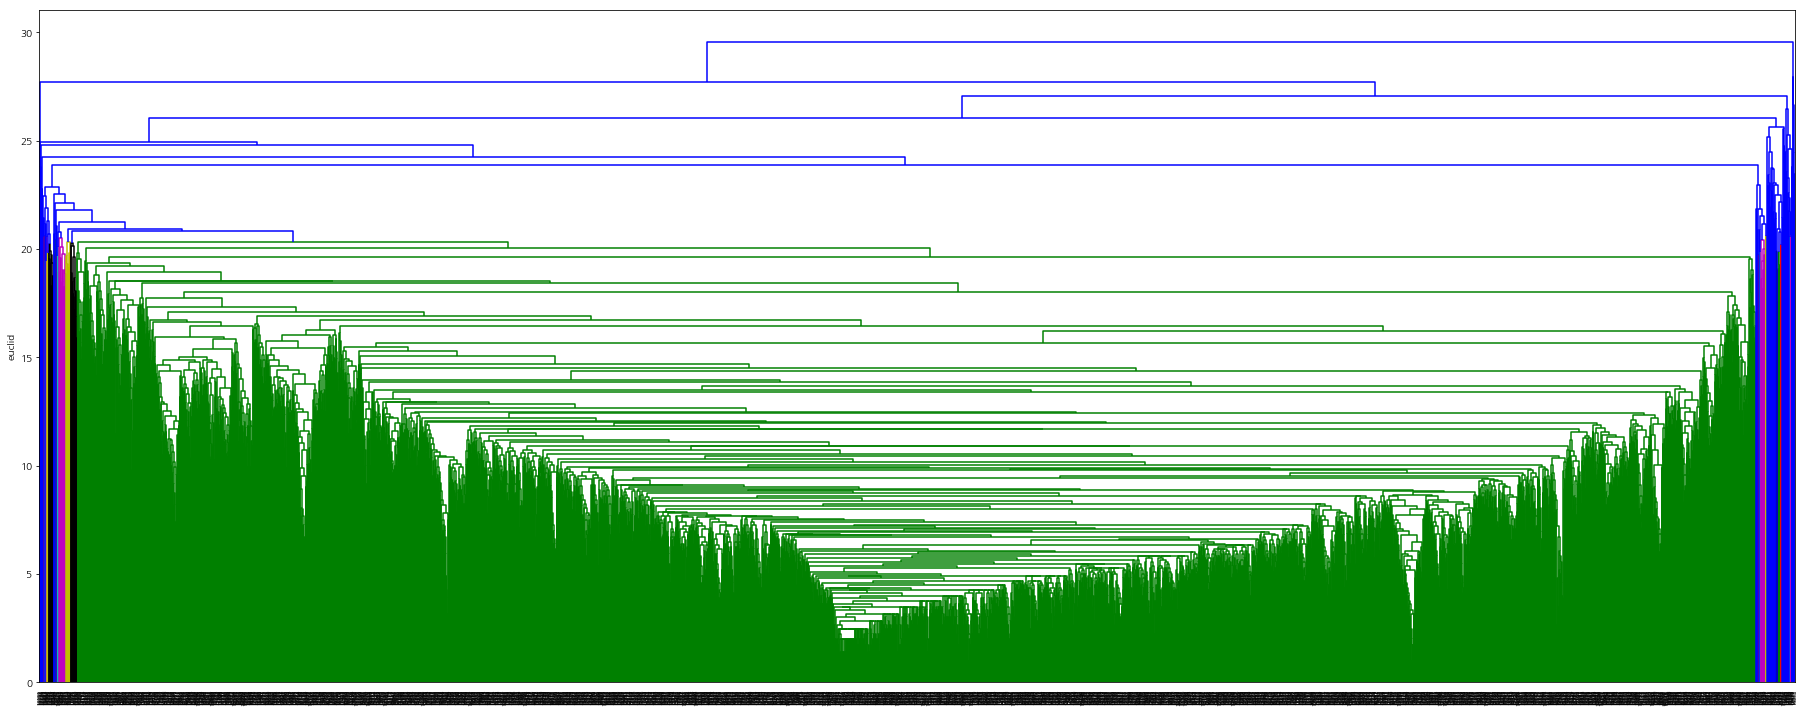

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram
# 유클리드 측정방법으로 단일(최단)연결법 Matrix 로 변환
row_clusters = linkage(test_data, method='complete',metric='euclidean')
# 사용자 ID를 사용자 코드로 변환
tmp_label    = [id_user_dic[i]   for i in range(len(id_user_dic))] 

# 플롯을 그립니다 (X축: 사용자 코드, Y축: 거리 계산법)
plt.figure(figsize=(25,10))
row_denr = dendrogram(row_clusters, labels=tmp_label)
plt.tight_layout(); plt.ylabel('euclid') ;plt.show()

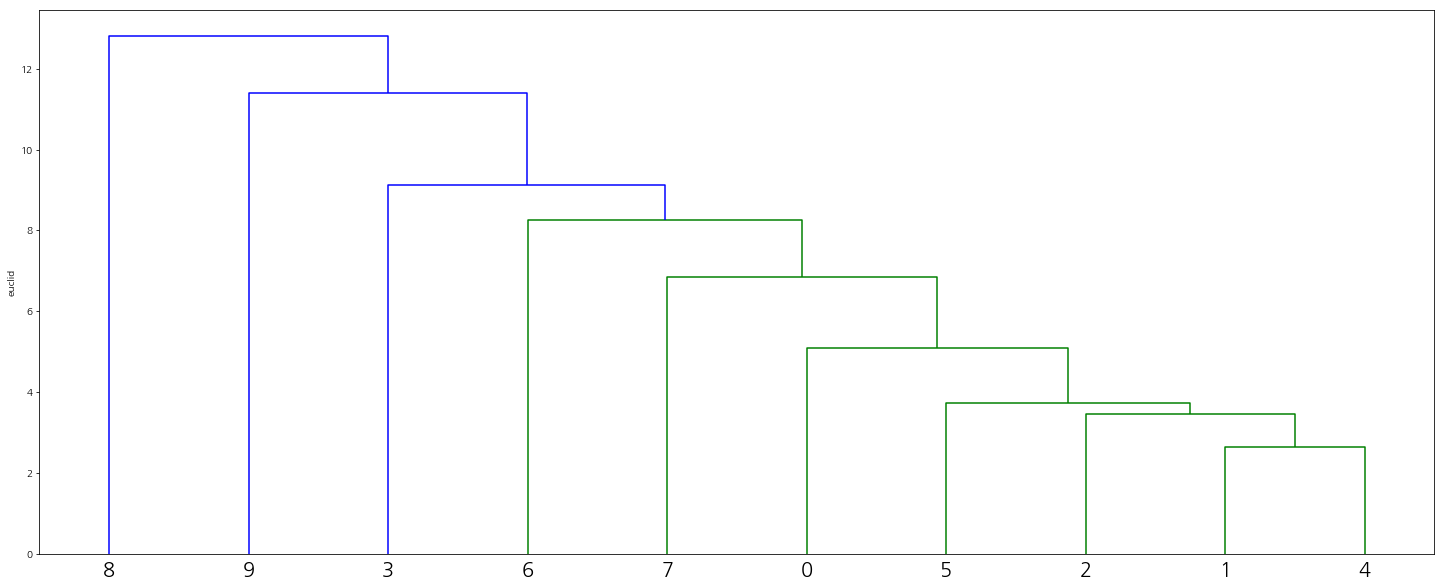

In [21]:
# 랜덤하게 10개만 선별한 뒤 계층도를 그립니다
import random
small_test_data    = np.array(random.sample(user_product_vec_li, 10))
small_row_clusters = linkage(small_test_data, method="complete", metric="euclidean")
plt.figure(figsize = (25,10))
dendrogram(small_row_clusters, labels=list(range(len(small_test_data))), leaf_font_size=20)
plt.ylabel("euclid")
plt.show()

### **05 K 평균 군집화 거리측정**
- sklearn을 활용한 집괴적 군집화 알고리즘


In [22]:
%%time
from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
ward.fit(test_data)
Counter(ward.labels_)

CPU times: user 17.6 s, sys: 145 ms, total: 17.8 s
Wall time: 17.8 s


In [23]:
# 집괴적 군집화로 생성된 클러스터내 상품 Keyword 출력
analyze_clusters_keywords_bigram(ward.labels_, product_id_name_dic, user_product_dic, id_user_dic)

cluster_id:1
[('RED RETROSPOT', 4977), ('JUMBO BAG', 4319), ('LUNCH BAG', 3710), ('METAL SIGN', 3651), ('T-LIGHT HOLDER', 3519), ('HOT WATER', 2869), ('WATER BOTTLE', 2869), ('CAKE CASES', 2852), ('VINTAGE CHRISTMAS', 2740), ('SET 3', 2698), ('SET 6', 2198), ('DOLLY GIRL', 2092), ('BAG VINTAGE', 1958), ("50'S CHRISTMAS", 1850), ('VINTAGE DOILY', 1780), ('PACK 12', 1750), ('HANGING HEART', 1678), ('SET 4', 1638), ('HOME SWEET', 1532), ('SWEET HOME', 1531)]
cluster_id:0
[('RED RETROSPOT', 1506), ('METAL SIGN', 1183), ('T-LIGHT HOLDER', 1127), ('JUMBO BAG', 1095), ('LUNCH BAG', 952), ('HOT WATER', 860), ('WATER BOTTLE', 860), ('SET 3', 852), ('CAKE CASES', 751), ('VINTAGE CHRISTMAS', 682), ('SET 6', 661), ('HANGING HEART', 545), ('HOME SWEET', 506), ('SWEET HOME', 506), ('SET 4', 503), ('DOLLY GIRL', 501), ('PACK 12', 486), ('BAG VINTAGE', 480), ('VINTAGE DOILY', 465), ("50'S CHRISTMAS", 444)]
